In [55]:
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u =  [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_c, t_u

(tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [56]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_c, t_pred_u):
    sd = (t_c - t_pred_u) ** 2
    return sd.mean()

In [57]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p, t_u

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [58]:
loss(t_c, t_p)

tensor(1763.8848)

In [49]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)

a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"z: {z.shape}, a: {a.shape}")

print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [50]:
delta = 0.1
learning_rate = 1e-4

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w

w = w - learning_rate * loss_rate_of_change_w


loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
loss_rate_of_change_b

b = b - learning_rate * loss_rate_of_change_b

delta, learning_rate, loss_rate_of_change_w, w, loss_rate_of_change_b, b

(0.1,
 0.0001,
 tensor(-989.5288),
 tensor(1.0990),
 tensor(-80.5225),
 tensor(0.0081))

In [71]:
def dmodel_dw(t_u, w, b):
    # model is t_u * w + b
    return t_u

def dmodel_db(t_u, w, b):
    # model is t_u * w + b
    return 1.0

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)   # 这个除法来自均值的导数    
    return dsq_diffs

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b) 
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) 

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f, Params %s' % (epoch, float(loss), params))
    return params

params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-5,
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u * 0.1, 
    t_c = t_c
)
params

Epoch 1, Loss 80.364342, Params tensor([1.0008e+00, 1.0640e-04])
Epoch 2, Loss 80.302986, Params tensor([1.0016e+00, 2.1272e-04])
Epoch 3, Loss 80.241707, Params tensor([1.0023e+00, 3.1895e-04])
Epoch 4, Loss 80.180511, Params tensor([1.0031e+00, 4.2510e-04])
Epoch 5, Loss 80.119377, Params tensor([1.0039e+00, 5.3118e-04])
Epoch 6, Loss 80.058304, Params tensor([1.0046e+00, 6.3716e-04])
Epoch 7, Loss 79.997330, Params tensor([1.0054e+00, 7.4307e-04])
Epoch 8, Loss 79.936432, Params tensor([1.0062e+00, 8.4889e-04])
Epoch 9, Loss 79.875603, Params tensor([1.0070e+00, 9.5463e-04])
Epoch 10, Loss 79.814835, Params tensor([1.0077, 0.0011])
Epoch 11, Loss 79.754143, Params tensor([1.0085, 0.0012])
Epoch 12, Loss 79.693520, Params tensor([1.0093, 0.0013])
Epoch 13, Loss 79.632988, Params tensor([1.0101, 0.0014])
Epoch 14, Loss 79.572517, Params tensor([1.0108, 0.0015])
Epoch 15, Loss 79.512115, Params tensor([1.0116, 0.0016])
Epoch 16, Loss 79.451805, Params tensor([1.0124, 0.0017])
Epoch 17,

tensor([2.2361, 0.0655])

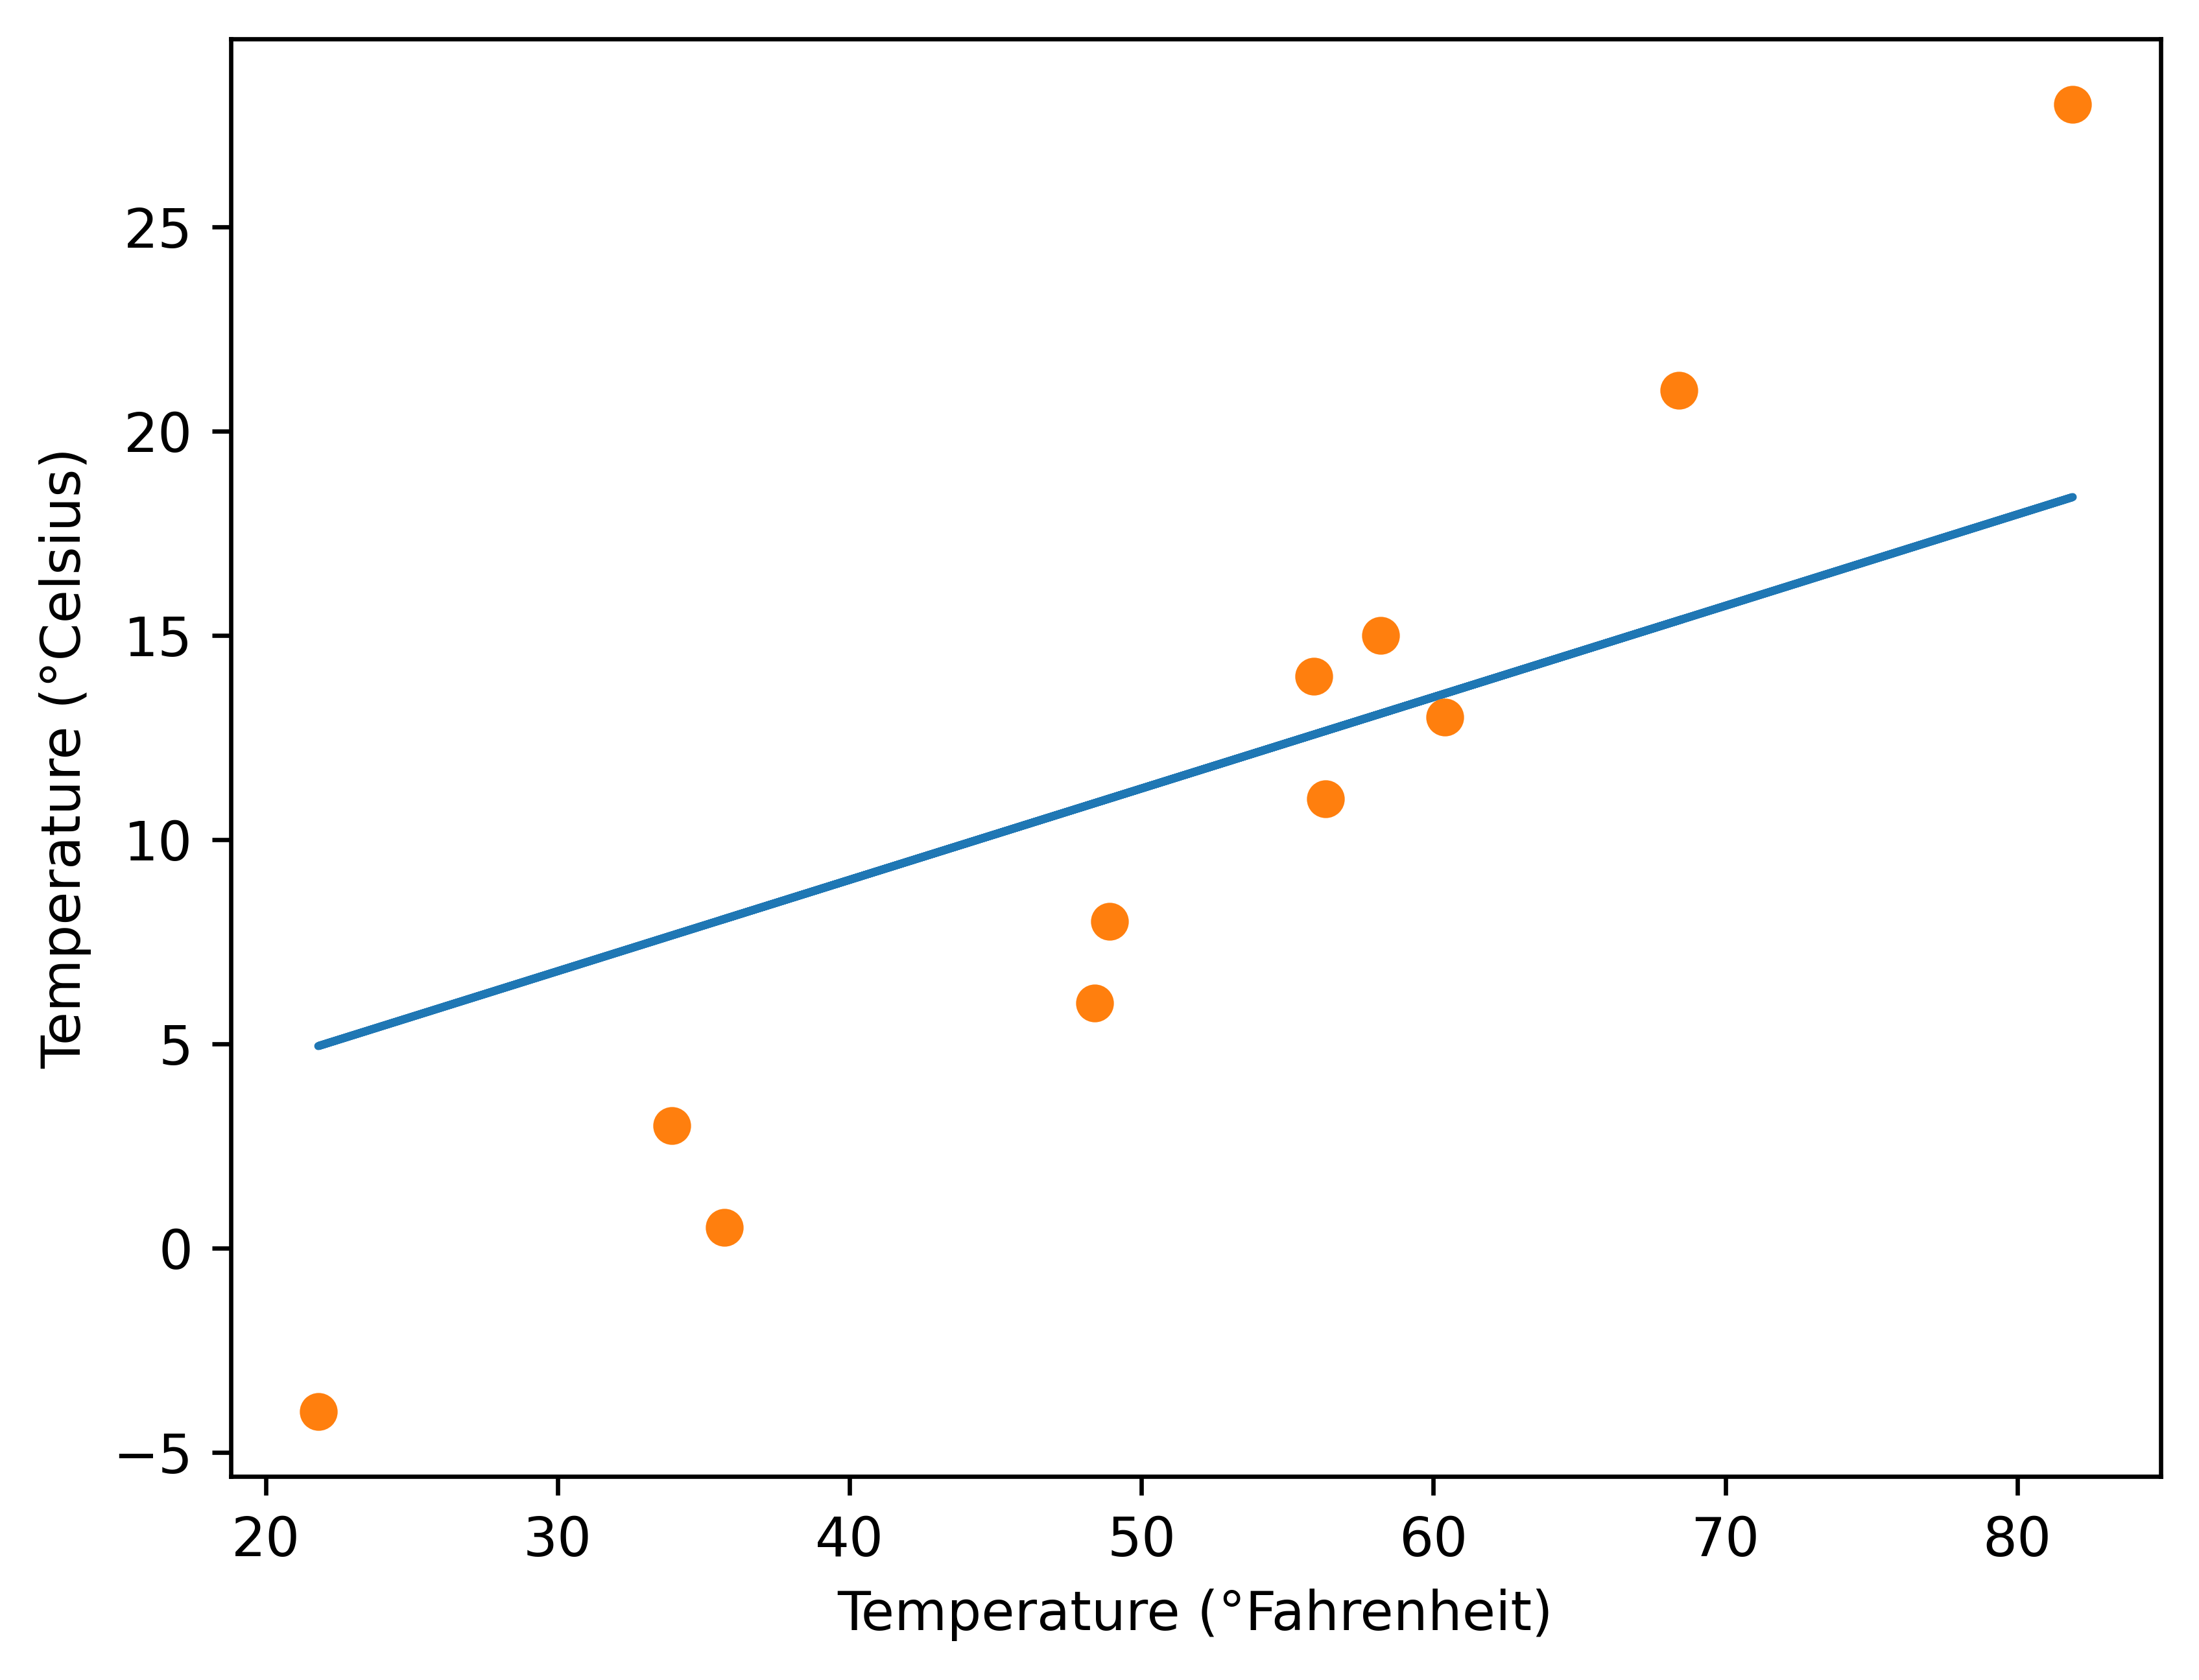

In [72]:
%matplotlib inline

from matplotlib import pyplot as plt
t_p = model(t_u * 0.1, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) #   ⇽---  但是我们画的是原始的未知数
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [74]:
# pytorch自动计算梯度

params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

loss

tensor(1763.8848, grad_fn=<MeanBackward0>)

In [77]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for i in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_c, t_p)
        loss.backward()
    
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if i % 500 == 0:
             print('Epoch %d, Loss %f' % (i, float(loss)))

    return params

params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-5,
    params = torch.tensor([1.0, 0.0], requires_grad=True), 
    t_u = t_u * 0.1, 
    t_c = t_c
)
params

Epoch 500, Loss 57.373318
Epoch 1000, Loss 44.784958
Epoch 1500, Loss 37.901421
Epoch 2000, Loss 34.128048
Epoch 2500, Loss 32.050251
Epoch 3000, Loss 30.896940
Epoch 3500, Loss 30.247673
Epoch 4000, Loss 29.873213
Epoch 4500, Loss 29.648615
Epoch 5000, Loss 29.505749


tensor([2.2361, 0.0655], requires_grad=True)

In [78]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [79]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [80]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [81]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([ 0.9123, -0.0016], requires_grad=True)

In [83]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for i in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_c, t_p)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 500 == 0:
             print('Epoch %d, Loss %f' % (i, float(loss)))

    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

params = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, 
    t_u = t_u * 0.1, 
    t_c = t_c
)
params

Epoch 500, Loss 57.373318
Epoch 1000, Loss 44.784958
Epoch 1500, Loss 37.901421
Epoch 2000, Loss 34.128048
Epoch 2500, Loss 32.050251
Epoch 3000, Loss 30.896940
Epoch 3500, Loss 30.247673
Epoch 4000, Loss 29.873213
Epoch 4500, Loss 29.648615
Epoch 5000, Loss 29.505749


tensor([2.2361, 0.0655], requires_grad=True)

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# 示例数据：[身高(cm), 体重(kg)]
inputs = torch.tensor([[180, 80], [165, 60], [170, 64], [160, 52], [175, 75]], dtype=torch.float32)
# 目标性别：男(1), 女(0)
labels = torch.tensor([[1], [0], [1], [0], [1]], dtype=torch.float32)

# 创建TensorDataset和DataLoader
# 主要用于降数据拆分成小批量，按照小批量计算损失和梯度
# 核心功能是：
# 1. 提供shuffle能力，为了使模型学习到更泛化的特征，而不是记住数据的顺序
# 2. 提升训练效率，批量处理 + 并行化
dataset = TensorDataset(inputs, labels)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [6]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 4),  # 输入层到隐藏层
    nn.ReLU(),        # 激活函数
    nn.Linear(4, 1)   # 隐藏层到输出层
)

In [7]:
loss_function = nn.BCEWithLogitsLoss()
# 优化器概念此处先忽略，后续文章重点介绍
# 你只需要知道，它是用来优化计算梯度，更新参数就可以
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
# 训练模型
epochs = 1000
for epoch in range(epochs):
    # 前向传播
    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 打印训练进度
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.6926
Epoch [200/1000], Loss: 0.6849
Epoch [300/1000], Loss: 0.6803
Epoch [400/1000], Loss: 0.6775
Epoch [500/1000], Loss: 0.6757
Epoch [600/1000], Loss: 0.6747
Epoch [700/1000], Loss: 0.6740
Epoch [800/1000], Loss: 0.6736
Epoch [900/1000], Loss: 0.6734
Epoch [1000/1000], Loss: 0.6733


In [16]:
with torch.no_grad():
    predictions = torch.sigmoid(model(inputs))
    predicted_classes = predictions.round()
    accuracy = (predicted_classes.eq(labels).sum() / float(labels.size(0))).item()
https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/    print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.00%


In [1]:
# https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/

import torch 

a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

b = w1*a 
c = w2*a

d = w3*b + w4*c 

L = 10 - d

print("The grad fn for a is", a.grad_fn)
print("The grad fn for d is", d.grad_fn)

The grad fn for a is None
The grad fn for d is <AddBackward0 object at 0x7fe19a2b4700>
